# Prueba comparador de estrategias

In [1]:
%matplotlib inline

import datetime
import pandas as pd
import sys

sys.path.append(r'../2_avisos_cambio_fondos')

from estrategias import Estrategia

from comparador import agrega_estrategias

# PARAMETROS PARA DEFINIR LA ESTRATEGIA
fecha_ini = datetime.datetime.strptime('2014-01-01', '%Y-%m-%d').date()
fecha_end = datetime.datetime.strptime('2020-11-23', '%Y-%m-%d').date()

afp = 'HABITAT'
monto_inicial = 100
lag_solicitud = 0


### 1. Comparemos la estrategia FF versus fondo A y fondo E, con LAG = 0 

In [2]:
estrategia_a = Estrategia(fecha_ini, fecha_end, 'A')
estrategia_e = Estrategia(fecha_ini, fecha_end, 'E')
estrategia_ff = Estrategia(fecha_ini, fecha_end, 'FF', 'anuncios_ff.xlsx')

lista_estrategias = [estrategia_a, estrategia_e, estrategia_ff]

df = agrega_estrategias(lista_estrategias, afp, monto_inicial, lag_solicitud)
df

,Fecha,Val_A_lag_0,Val_E_lag_0,Val_FF_lag_0
0,2014-01-01,100.000000,100.000000,100.000000
1,2014-01-02,100.336932,100.033161,100.336932
2,2014-01-03,100.253135,100.009698,100.253135
3,2014-01-04,100.253135,100.009698,100.253135
4,2014-01-05,100.253135,100.009698,100.253135
...,...,...,...,...
2514,2020-11-19,181.489112,166.616435,168.894963
2515,2020-11-20,181.551498,166.315627,168.880442
2516,2020-11-21,181.551498,166.315627,168.880442
2517,2020-11-22,181.551498,166.315627,168.880442


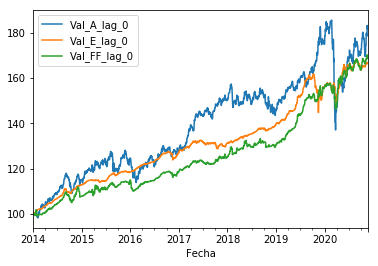

In [3]:
df.set_index('Fecha').plot()

### 2. Comparemos la estrategia FF versus fondo A y fondo E, con LAG = 2

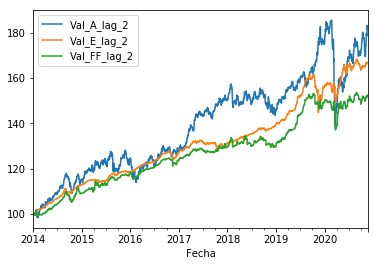

In [4]:
df = agrega_estrategias(lista_estrategias, afp, monto_inicial, lag_solicitud=2)
df.set_index('Fecha').plot()

### 3. Comparemos fondo A versus estrategia FF con 0 y 2 dias de LAG 

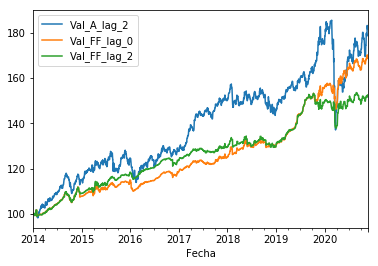

In [5]:
lista_estrategias = [estrategia_a, estrategia_ff, estrategia_ff]

df = agrega_estrategias(lista_estrategias, afp, monto_inicial, [2, 0, 2])
df.set_index('Fecha').plot()

### 4. Comparemos fondo A versus estrategia FF verus estrategia "MAX"

**HIPOTESIS:** Si alguien tiene la capacidad para "predecir" al mercado, su curva de rendimientos debería estar entre la curva pasiva y la curva de mejores rendimientos (Estrategia "MAX").

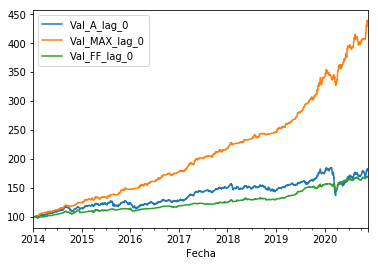

In [7]:
estrategia_max = Estrategia(fecha_ini, fecha_end, 'MAX', 'optima_HABITAT.xlsx')

lista_estrategias = [estrategia_a, estrategia_max, estrategia_ff]

df = agrega_estrategias(lista_estrategias, afp, monto_inicial, 0)
df.set_index('Fecha').plot()